In [1]:
using Revise
using BiMDPs


[ Info: Precompiling BiMDPs [8af17bd5-7ea0-4ae2-8fd5-dbf3cdd18bce]


In [2]:
dir = "case002"

"case002"

In [3]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles: Array{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}((1,))
  exit_xys: Array{Tuple{Int64, Int64}}((0,))


## Testing LL

In [4]:
BiMDPs.test_LL()

passed
========== LLRoverWorldMDP ==========
grid_size: (20, 20)
max_time: 10
null_xy: (-1, -1)
p_transition: 1.0
γ: 0.95
current_tgt: ((5, 1), (1, 10), 50.0)
obstacles: [((3, 1), (1, 10), -5.0)]
exit_xys: Tuple{Int64, Int64}[]
init_state: BiMDPs.LLRoverWorld.LLState(2, 6, 1)
LL: in state BiMDPs.LLRoverWorld.LLState(2, 6, 1), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 5, 2), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 4, 3), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 3, 4), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 2, 5), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(3, 2, 6), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(4, 2, 7), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(4, 1, 8), taking action RIGHT, received reward 0
LL: in s

## Plot rewards grid

In [5]:
RoverWorld.create_reward_field_evolution_gif(rgw; dir=dir)

"case002/reward_evolution.gif"

## Construct bi-level MDP

In [6]:
hl_mdp, hl_policy = convert_to_bilevel(rgw)

(BiMDPs.HLRoverWorld.HLRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  exit_xys: Array{Tuple{Int64, Int64}}((0,))
, DiscreteValueIteration.ValueIterationPolicy{Matrix{Float64}, Vector{Float64}, Vector{Int64}, BiMDPs.HLRoverWorld.HLAction, BiMDPs.HLRoverWorld.HLRoverWorldMDP}([92.625 47.5; 92.625 47.5; … ; 0.0 0.0; 0.0 0.0], [92.625, 92.625, 47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 88.2253125, 47.5  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], BiMDPs.HLRoverWorld.HLAction[BiMDPs.HLRoverWorld.HLAction(1), BiMDPs.HLRoverWorld.HLAction(2)], true, BiMDPs.HLRoverWorld.HLRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  exit_xys: Arra

## View stepthrough of one HL policy

In [7]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)

In [8]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 100.0.


## Another example

In [9]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

20-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[1, 0]), a = BiMD

In [10]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 50.0.


## From a non-starting state

In [11]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

Initial state BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]) is out of bounds.


In [12]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

Initial state BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]) is out of bounds.


## Compare optimality vs computation time


In [22]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 5], 500), ("vi", [1, 5], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

In [25]:
results = optimality_vs_compute(rgw, [("bl_vi", [50, 100], 10), ("vi", [1, 5], 500)])

Comp_time of HL part of bl_vi after 50 iterations: 0.099736
Comp_time of HL part of bl_vi after 50 iterations: 0.099736
Simulation 1
HL: in state BiMDPs.HLRoverWorld.HLState(6, 10, 1, Bool[0, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(6, 10, 1, Bool[0, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0502417
LL: in state BiMDPs.LLRoverWorld.LLState(6, 10, 1), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(6, 9, 2), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(6, 8, 3), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(6, 7, 4), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(7, 7, 5), taking action DOWN, received reward

Comp_time of LL part of bl_vi after 50 iterations: 0.0491072
LL: in state BiMDPs.LLRoverWorld.LLState(2, 7, 1), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 6, 2), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 5, 3), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 4, 4), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 3, 5), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 2, 6), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(3, 2, 7), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(4, 2, 8), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(5, 2, 9), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(6, 2, 10), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(7,

Comp_time of LL part of bl_vi after 50 iterations: 0.0550333
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 17), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 9, 18), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 10, 19), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 10, 20), taking action UP, received reward 0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0491738
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 20), taking action UP, received reward 0
Rewards for simulation 5: 100.0
Simulation 6
HL: in state BiMDPs.HLRoverWo

Comp_time of LL part of bl_vi after 50 iterations: 0.0456152
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0529235
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: 

ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0564798
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 6), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 7, 7), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 6, 8), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 5, 9), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 4, 10), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 3, 11), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 12), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 12, Bool[0, 0]), taking action BiMDPs.HLRoverWorld.HLAction(2), received reward 50.0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 12, Bool[0, 0]) to do action ((9, 8), (15, 20), 50.0)
ll_mdp tgt: ((9, 8), (15, 

ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0570533
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0510479
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6

ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.0550864
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 8, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 50 iterations: 0.048257
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 8), taking action UP, received reward 50.0
Rewards for simulation 10: 1000.0
Adding a mean time for LL comp: 0.36722216999999996
Reward of bl_vi after 10 simulations: μ = 290.0, σ = 374.7591819348052
Comp_time of HL part of bl_vi after 100 iterations: 0.1046424
Comp_time of HL part of bl_vi after 100 iterations: 0.1046424
Simulation 1
HL: in

ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 100 iterations: 0.0470302
LL: in state BiMDPs.LLRoverWorld.LLState(10, 3, 1), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 4, 2), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 5, 3), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 6, 4), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 7, 5), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 8, 6), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 9, 7), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 10, 8), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 10, 9), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(10, 10, 10), taking action UP, received reward 0
LL: in state Bi

Comp_time of LL part of bl_vi after 100 iterations: 0.052771
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 7), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 100 iterations: 0.0505652
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 7), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys:

Comp_time of LL part of bl_vi after 100 iterations: 0.0464665
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 19), taking action UP, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 9, 20), taking action UP, received reward 0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 100 iterations: 0.055981
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 20), taking action UP, received reward 0
Rewards for simulation 5: 100.0
Simulation 6
HL: in state BiMDPs.HLRoverWorld.HLState(7, 10, 1, Bool[0, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(7, 10, 1, Bool[0, 0]) 

Comp_time of LL part of bl_vi after 100 iterations: 0.0490169
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 7), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 100 iterations: 0.0527709
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 7), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 7, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys

Comp_time of LL part of bl_vi after 100 iterations: 0.0563964
LL: in state BiMDPs.LLRoverWorld.LLState(9, 8, 8), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 7, 9), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 6, 10), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 5, 11), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 4, 12), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 3, 13), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 14), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 14, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(2), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 14, Bool[1, 0]) to do action ((9, 8), (15, 20), 50.0)
ll_mdp tgt: ((9, 8), (15, 20), 50.0)
ll_mdp obstacles: [((6, 6), 

Comp_time of LL part of bl_vi after 100 iterations: 0.0467363
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 4), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 4, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 4, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys: Tuple{Int64, Int64}[]
Comp_time of LL part of bl_vi after 100 iterations: 0.0487425
LL: in state BiMDPs.LLRoverWorld.LLState(9, 2, 4), taking action UP, received reward 50.0
HL: in state BiMDPs.HLRoverWorld.HLState(9, 2, 4, Bool[1, 0]), taking action BiMDPs.HLRoverWorld.HLAction(1), received reward 0
Creating LL MDP from state BiMDPs.HLRoverWorld.HLState(9, 2, 4, Bool[1, 0]) to do action ((9, 2), (1, 18), 50.0)
ll_mdp tgt: ((9, 2), (1, 18), 50.0)
ll_mdp obstacles: [((6, 6), (1, 20), -5.0)]
ll_mdp exit_xys

Comp_time of vi after 5 iterations: 0.175366
Reward of vi after 500 simulations: μ = 23.313311830068724, σ = 29.160799342361408


Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "vi"    => ([0.0428039, 0.175366], [1.1546, 23.3133], [8.17606, 29.1608])
  "bl_vi" => ([0.466958, 0.555639], [290.0, 390.0], [374.759, 422.164])

In [19]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 5, 50, 100, 150], 500), ("vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

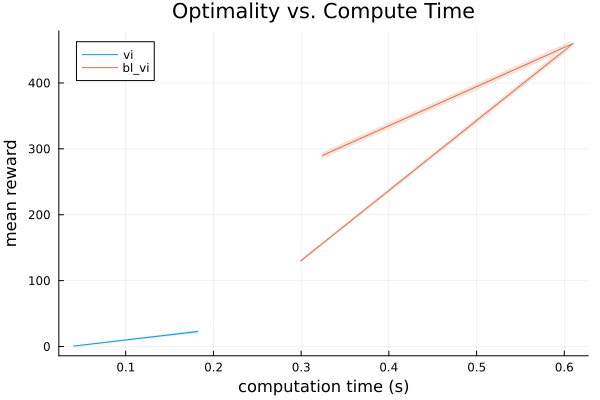

In [20]:
RoverWorld.plot_optimality_vs_compute(results, dir = dir)